In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2,7,8,2,9,11,7.0,7,1.0,8.0,5.0,6,NaN
1,4.0,7.0,5.0,5.0,5,5,9,6,4,8,7.0,9,2.0,9.0,7.0,10,NaN
2,7.0,10.0,8.0,7.0,4,8,8,5,10,11,2.0,8,2.0,5.0,5.0,10,NaN
3,4.0,9.0,5.0,7.0,4,7,7,13,1,7,6.0,8,3.0,8.0,0.0,8,NaN
4,6.0,7.0,8.0,5.0,4,7,6,3,7,10,7.0,9,3.0,8.0,3.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,NaN,NaN,NaN,3,4,10,7,8,12,NaN,9,NaN,NaN,NaN,6,NaN
19996,NaN,NaN,NaN,NaN,3,7,8,2,10,12,NaN,8,NaN,NaN,NaN,8,NaN
19997,4.0,8.0,4.0,6.0,4,7,8,7,4,10,7.0,6,3.0,9.0,3.0,7,NaN
19998,4.0,11.0,4.0,8.0,3,0,2,4,6,1,0.0,7,0.0,8.0,0.0,8,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4000
float64		column 2	4000
float64		column 3	4000
float64		column 4	4000
int64		column 5	0
int64		column 6	0
int64		column 7	0
int64		column 8	0
int64		column 9	0
int64		column 10	0
float64		column 11	4000
int64		column 12	0
float64		column 13	4000
float64		column 14	4000
float64		column 15	4000
int64		column 16	0
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,16000.000000,16000.000000,16000.000000,16000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16000.000000,20000.000000,16000.000000,16000.000000,16000.000000,20000.00000,0.0
mean,4.022625,7.006563,5.141125,5.356813,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.493750,7.929000,3.093000,8.342000,3.710500,7.80120,NaN
std,1.890724,3.279568,1.991063,2.255951,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.575194,2.080619,2.333252,1.543109,2.551783,1.61747,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,NaN


<AxesSubplot:>

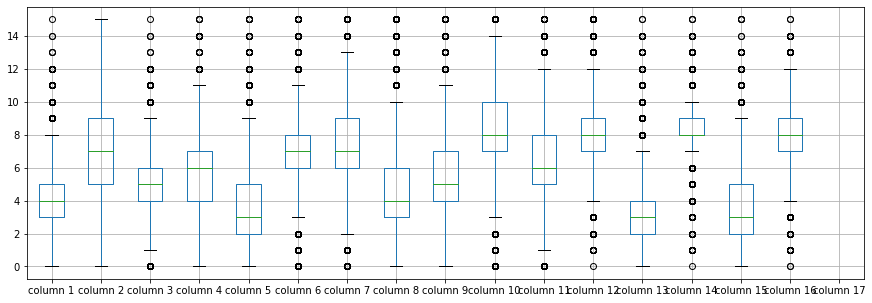

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.022625
column 2     7.006563
column 3     5.141125
column 4     5.356813
column 5     3.505850
column 6     6.897600
column 7     7.500450
column 8     4.628600
column 9     5.178650
column 10    8.282050
column 11    6.493750
column 12    7.929000
column 13    3.093000
column 14    8.342000
column 15    3.710500
column 16    7.801200
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.758772,0.848759,0.676240,0.614717,-0.040040,0.035037,0.013580,0.034643,0.133506,0.031801,-0.052452,0.484404,0.095487,0.266157,-0.125839,NaN
column 2,0.758772,1.000000,0.673368,0.820411,0.554713,0.038130,-0.035708,-0.033853,0.078989,0.149716,-0.052722,-0.022583,0.277951,0.002743,0.221533,-0.063004,NaN
column 3,0.848759,0.673368,1.000000,0.659144,0.763783,0.054940,0.012476,-0.101517,0.049104,0.100358,0.008108,-0.047701,0.554451,0.038811,0.250614,-0.139370,NaN
column 4,0.676240,0.820411,0.659144,1.000000,0.645499,0.034570,-0.016481,0.077593,0.032492,-0.003501,-0.010563,0.007402,0.271986,0.030551,0.293250,-0.041552,NaN
column 5,0.614717,0.554713,0.763783,0.645499,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.080928,-0.038858,0.629399,0.011421,0.485786,-0.062969,NaN
column 6,-0.040040,0.038130,0.054940,0.034570,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.370943,-0.032115,0.142770,-0.252322,0.132847,0.248816,NaN
column 7,0.035037,-0.035708,0.012476,-0.016481,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.592930,-0.271649,-0.067757,0.546184,-0.100523,-0.207900,NaN
column 8,0.013580,-0.033853,-0.101517,0.077593,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.035964,0.082020,0.152018,-0.081607,0.002482,0.182902,NaN
column 9,0.034643,0.078989,0.049104,0.032492,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.055722,0.119048,-0.384995,-0.054328,0.254718,-0.061335,NaN
column 10,0.133506,0.149716,0.100358,-0.003501,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.043544,-0.106759,-0.198676,0.032857,-0.112224,-0.114223,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+2,17+2+2,17+2+2+2,17+2+2,17+2,17], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 72.53661227111816
Epoch: 1 , loss: 46.52814047698975
Epoch: 2 , loss: 42.232408106994626
Epoch: 3 , loss: 40.5128595123291
Epoch: 4 , loss: 39.59271069335937
Epoch: 5 , loss: 38.714445419311524
Epoch: 6 , loss: 38.40933114013672
Epoch: 7 , loss: 38.333376573181155
Epoch: 8 , loss: 38.041658862304686
Epoch: 9 , loss: 37.926163143920895
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.742159
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
1,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
2,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
3,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
4,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.189221,-1.550658,1.355675,-1.464814,0,0,0,0,0,0,-2.157339,0,1.600655,1.341774,2.569782,0,NaN
19996,-1.007281,-2.116482,-2.307045,-1.097344,0,0,0,0,0,0,-1.259115,0,1.018749,-2.967159,-3.325244,0,NaN
19997,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
19998,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

494.07073761066937

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.13232325402946304

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.091569
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.000000,4.000000,4.000000,3.000000,2,7,8,2,9,11,7.000000,7,1.000000,8.000000,5.000000,6,-1.080688
1,4.000000,7.000000,5.000000,5.000000,5,5,9,6,4,8,7.000000,9,2.000000,9.000000,7.000000,10,-0.918711
2,7.000000,10.000000,8.000000,7.000000,4,8,8,5,10,11,2.000000,8,2.000000,5.000000,5.000000,10,-0.597590
3,4.000000,9.000000,5.000000,7.000000,4,7,7,13,1,7,6.000000,8,3.000000,8.000000,0.000000,8,-0.805348
4,6.000000,7.000000,8.000000,5.000000,4,7,6,3,7,10,7.000000,9,3.000000,8.000000,3.000000,7,-1.335654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.810779,8.449342,6.355675,6.535186,3,4,10,7,8,12,7.842661,9,3.600655,10.341774,4.569782,6,-1.118065
19996,2.992719,4.883518,3.692955,3.902656,3,7,8,2,10,12,4.740885,8,2.018749,6.032841,2.674756,8,-0.537992
19997,4.000000,8.000000,4.000000,6.000000,4,7,8,7,4,10,7.000000,6,3.000000,9.000000,3.000000,7,-0.047038
19998,4.000000,11.000000,4.000000,8.000000,3,0,2,4,6,1,0.000000,7,0.000000,8.000000,0.000000,8,-0.558499


In [21]:
imputations[-1].to_excel("Letter_AL_1(imp).xlsx", index=False, header=False)